# Succession diagagram compression tutorial
In this tutorial, we discuss how to compress a complicated succession diagram to focus attention on a key combinations of variable values and to ignore irrelevant variables.

In [67]:
import pystablemotifs as sm

For this example, we will use a model of the yeast-to-hyphal transition.

In [68]:
rules="""pH *= pH
Farnesol *= Farnesol
Temperature *= Temperature
Rim8 *= pH
Cyr1 *= Temperature and not Farnesol
ESCRT *= Rim8
cAMP_PKA *= Cyr1
NRG1_T *= not Brg1 and not Ume6 and (not Efg1_active or not (ESCRT or cAMP_PKA)) or hyphal_initiation
Nrg1_HAGs *= NRG1_T and (not HDACs or HATs)
Efg1_active *= (ESCRT or cAMP_PKA) and Efg1
EFG1_T *= Brg1 or not Efg1_active
Efg1 *= EFG1_T
Brg1 *= not Nrg1_HAGs
Ume6 *= Brg1 and not Nrg1_HAGs
HDACs *= Brg1
HATs *= Efg1_active and not HDACs
hyphal_initiation *= (HATs and Brg1 and not Nrg1_HAGs) or hyphal_initiation
hyphal_maintenance *= (Ume6 and not Nrg1_HAGs) and hyphal_initiation
HAG_T *= (Brg1 or Ume6) and not Nrg1_HAGs"""

primes = sm.format.create_primes(rules)

In [69]:
ar=sm.AttractorRepertoire.from_primes(yht_primes)
ar.summary()

There are 27 attractors.
{'Brg1': 1, 'Cyr1': 0, 'EFG1_T': 1, 'ESCRT': 0, 'Efg1': 1, 'Efg1_active': 0, 'Farnesol': 0, 'HAG_T': 1, 'HATs': 0, 'HDACs': 1, 'NRG1_T': 1, 'Nrg1_HAGs': 0, 'Rim8': 0, 'Temperature': 0, 'Ume6': 1, 'cAMP_PKA': 0, 'hyphal_initiation': 1, 'hyphal_maintenance': 1, 'pH': 0}

{'Brg1': 1, 'Cyr1': 0, 'EFG1_T': 1, 'ESCRT': 0, 'Efg1': 1, 'Efg1_active': 0, 'Farnesol': 0, 'HAG_T': 1, 'HATs': 0, 'HDACs': 1, 'NRG1_T': 0, 'Nrg1_HAGs': 0, 'Rim8': 0, 'Temperature': 0, 'Ume6': 1, 'cAMP_PKA': 0, 'hyphal_initiation': 0, 'hyphal_maintenance': 0, 'pH': 0}

{'Brg1': 0, 'Cyr1': 0, 'EFG1_T': 1, 'ESCRT': 0, 'Efg1': 1, 'Efg1_active': 0, 'Farnesol': 0, 'HAG_T': 0, 'HATs': 0, 'HDACs': 0, 'NRG1_T': 1, 'Nrg1_HAGs': 1, 'Rim8': 0, 'Temperature': 0, 'Ume6': 0, 'cAMP_PKA': 0, 'hyphal_initiation': 1, 'hyphal_maintenance': 0, 'pH': 0}

{'Brg1': 0, 'Cyr1': 0, 'EFG1_T': 1, 'ESCRT': 0, 'Efg1': 1, 'Efg1_active': 0, 'Farnesol': 0, 'HAG_T': 0, 'HATs': 0, 'HDACs': 0, 'NRG1_T': 1, 'Nrg1_HAGs': 1, 'Rim8': 0

We note that these 27 attractors are difficult to interpret. Furthermore, the succession diagram (below) is also complicated, even without the attractors included in the plot.

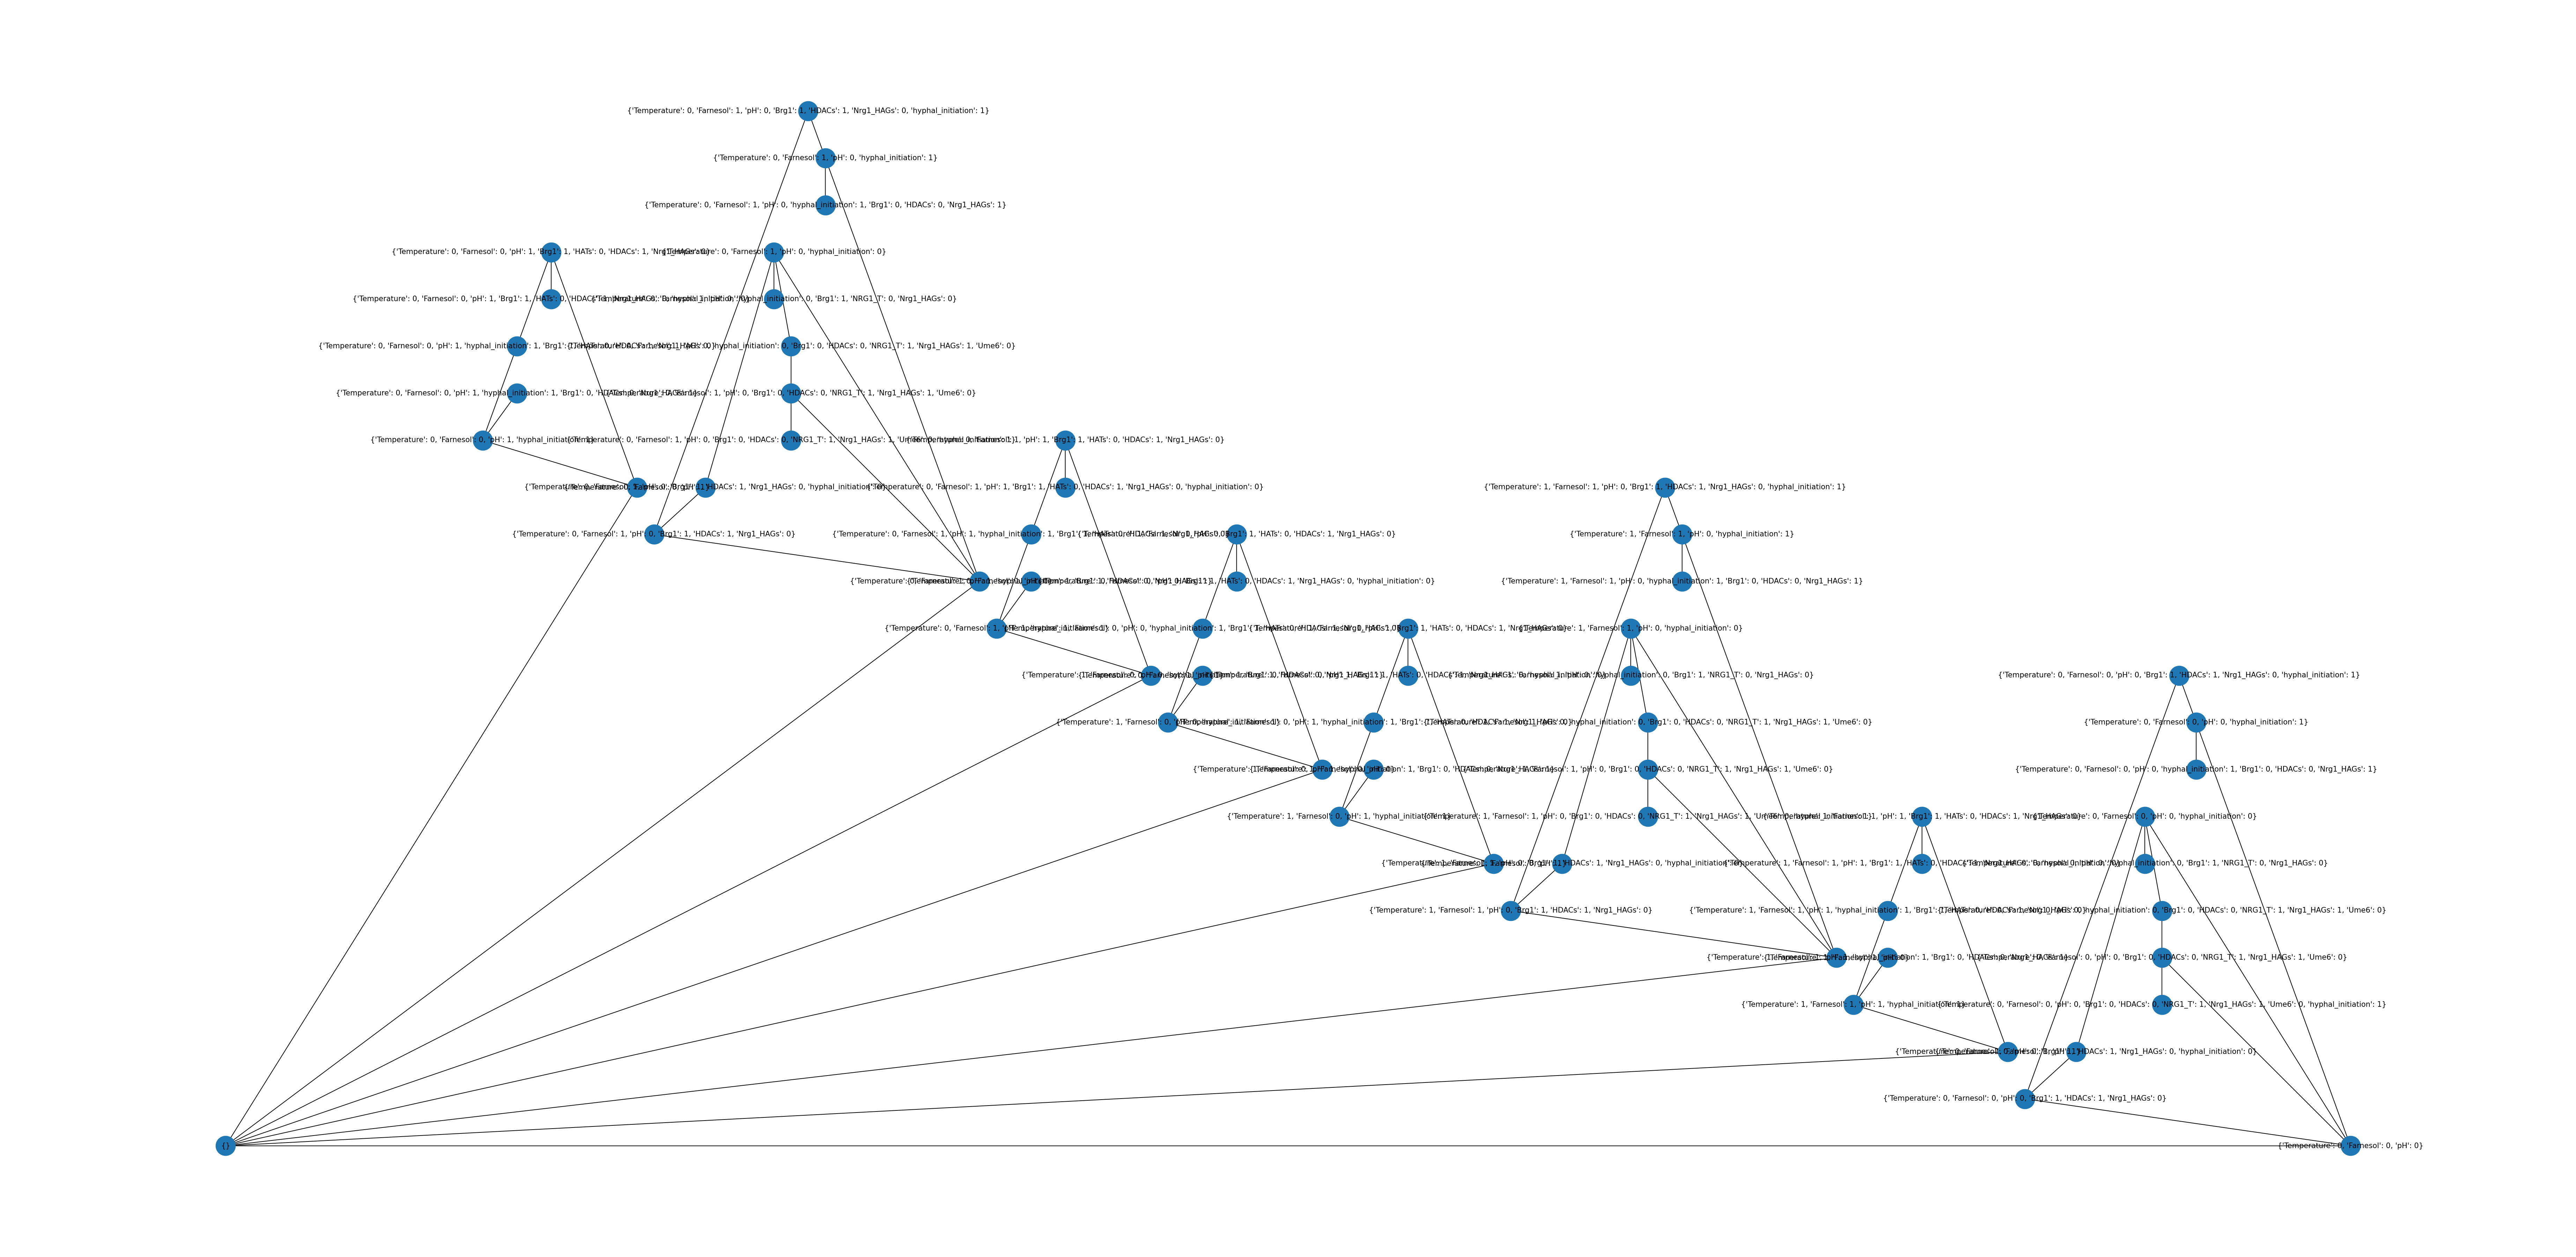

In [70]:
GR=sm.export.networkx_succession_diagram(ar,include_attractors_in_diagram=False)
sm.export.plot_nx_succession_diagram(GR,nx_node_label_kwargs={'font_size':21})

In this particular model, it happens that combinations of source node variables `pH`, `Farnesol`, and `Temperature` are especially important. We first calculate which nodes are fully determined by the values of these source nodes. Such nodes, taken together with these three source nodes are what we will refer to as "condition variables", as they describe the yeast's environmental conditions and its immediate response to its environment.

In [71]:
condition_vars = set(['pH','Farnesol','Temperature'])
new_addition = True
for i in range(len(primes)):
    new_addition = False
    for var,rule in primes.items():
        for imp in rule[1]:
            if all([reg in condition_vars for reg in imp]):
                condition_vars.add(var)
condition_vars = list(condition_vars)
print(condition_vars)

['Temperature', 'Farnesol', 'ESCRT', 'cAMP_PKA', 'Rim8', 'pH', 'Cyr1']


Some combinations of source variables are known to favor the yeast state over the hyphal state. We incorporate this as a new "tracker" variable in the rules.

In [72]:
yfc_rule="Yeast_favoring_conditions *= not pH and (Farnesol or not Temperature)"
yfc_prime = sm.format.create_primes(yfc_rule)
primes2 = primes.copy()
primes2['Yeast_favoring_conditions']=yfc_prime['Yeast_favoring_conditions']
sm.format.pretty_print_prime_rules(primes2)

Brg1* = !Nrg1_HAGs
Cyr1* = !Farnesol & Temperature
EFG1_T* = !Efg1_active | Brg1
ESCRT* = Rim8
Efg1* = EFG1_T
Efg1_active* = Efg1 & cAMP_PKA | ESCRT & Efg1
Farnesol* = Farnesol
HAG_T* = !Nrg1_HAGs & Ume6 | Brg1 & !Nrg1_HAGs
HATs* = Efg1_active & !HDACs
HDACs* = Brg1
NRG1_T* = !Brg1 & !ESCRT & !Ume6 & !cAMP_PKA | !Brg1 & !Efg1_active & !Ume6 | hyphal_initiation
Nrg1_HAGs* = !HDACs & NRG1_T | HATs & NRG1_T
Rim8* = pH
Temperature* = Temperature
Ume6* = Brg1 & !Nrg1_HAGs
cAMP_PKA* = Cyr1
hyphal_initiation* = Brg1 & HATs & !Nrg1_HAGs | hyphal_initiation
hyphal_maintenance* = !Nrg1_HAGs & Ume6 & hyphal_initiation
pH* = pH
Yeast_favoring_conditions* = !Temperature & !pH | Farnesol & !pH


We calculate the attractor repertoire for this modified version. Because the tracker variable is a sink node, the set of attractors is equivalent.

In [26]:
ar2 = sm.AttractorRepertoire.from_primes(primes2)

We now consider a version of the succession diagram that ignores differences between the condition variables. Because the variable `Yeast_favoring_conditions` is not among the condition variables, we do not lose all information about the environment; rather it is now simply condensed.

In [73]:
ar2.simplify_diagram(condition_vars)

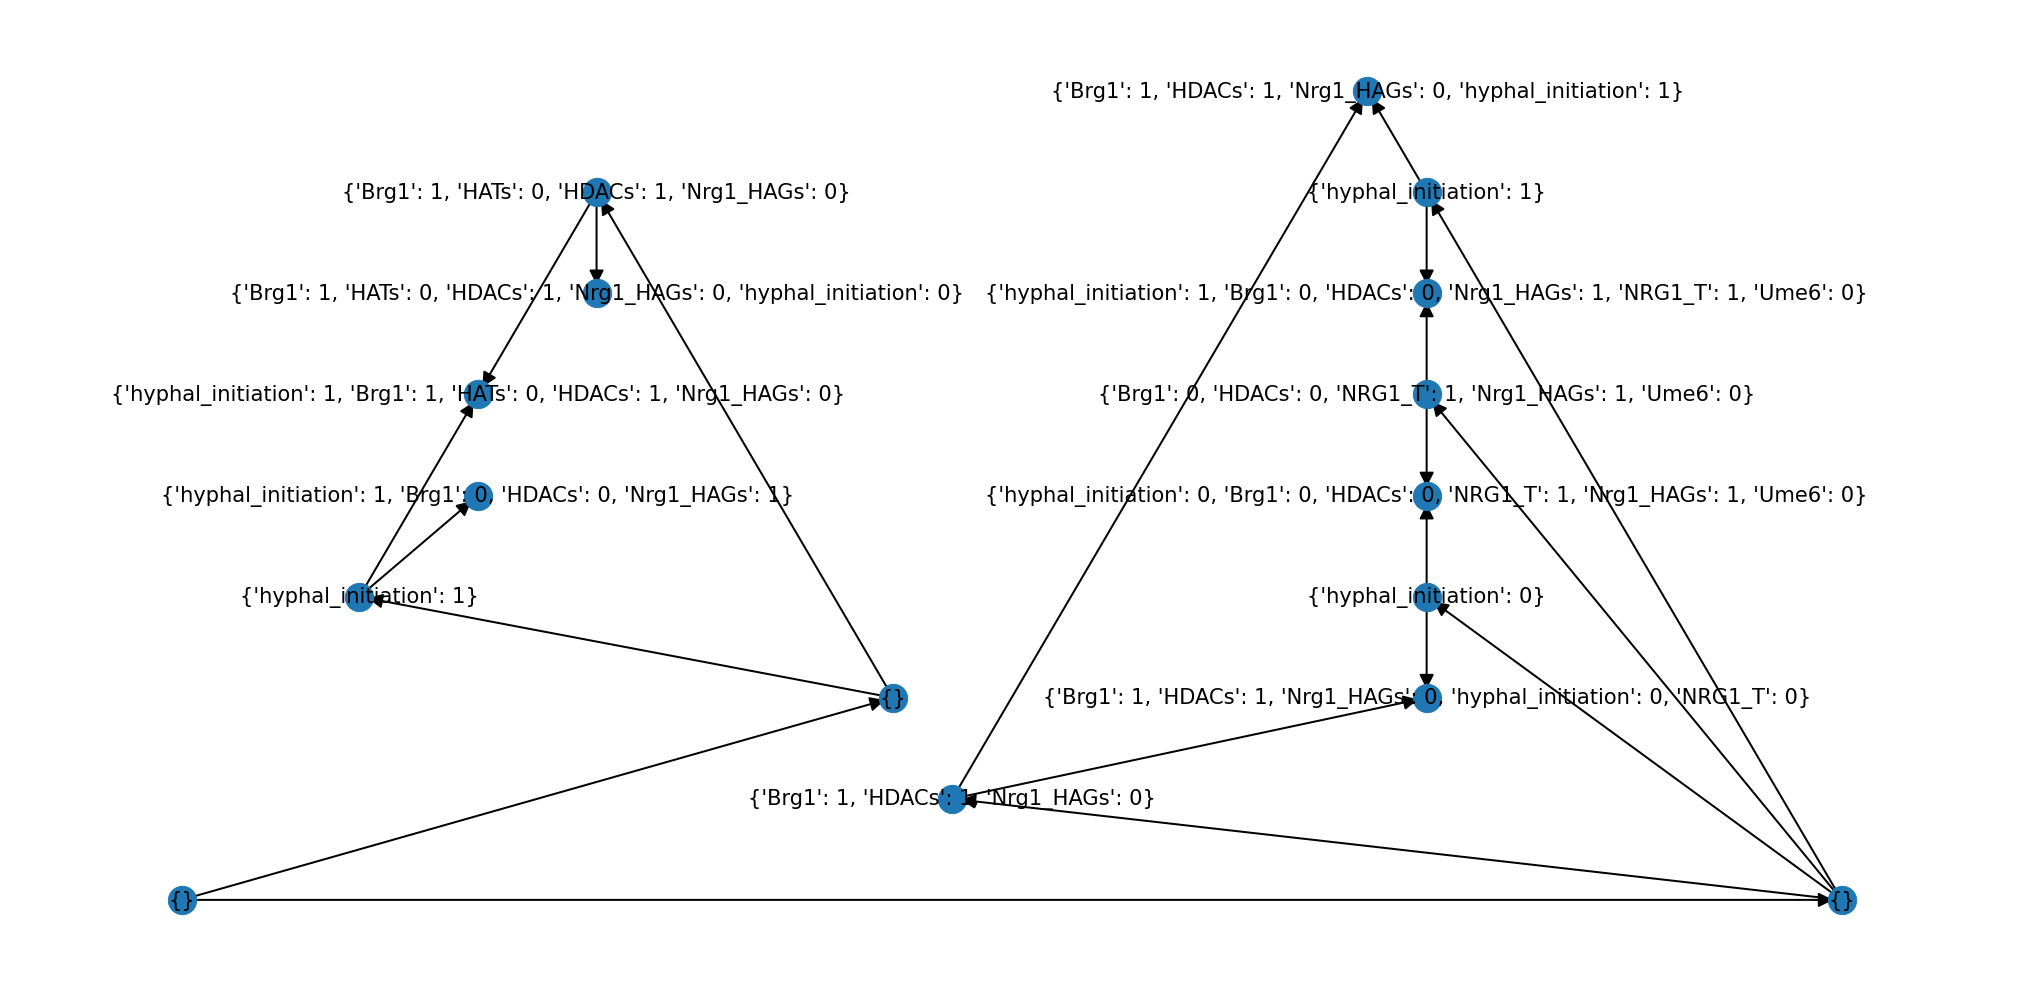

In [74]:
GR2=sm.export.networkx_succession_diagram(ar2,include_attractors_in_diagram=False)
sm.export.plot_nx_succession_diagram(GR2,nx_node_label_kwargs={'font_size':21})

Note that some of the node labels are equivalent (the label `'{}'` is such an example). Such nodes can be distinguished if one uses the `labeling_convention=states` argument in the plotting function. Unfortunately, this greatly increases the length of the labels. Alternatively, one can extract relevant metadata using standard `networkx` methods, as below:

In [80]:
for k in GR2.nodes(): 
    if GR2.nodes[k]['label'] == '{}':
        print( GR2.nodes[k]['states'] )

{}
{'Yeast_favoring_conditions': 1, 'Efg1_active': 0, 'HATs': 0, 'EFG1_T': 1, 'Efg1': 1}
{'Yeast_favoring_conditions': 0}


For a more in-depth exploration, one may wish to use an external graphical program to view the succession diagram. One can export the graph to a yED-viewable format, as described in the Basic Usage tutorial using the function `pystablemotifs.export.save_to_graphml`.